# Semaine du 11 mars au 15 mars 2024

## Deuxiemes tests sans mousse pour avoir le temps caracteristiques du remplissage et vidange du $CO_2$

### Debit 100% $CO_2$ (1000 ml/min)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
file_path='/home/ruben/M2-THESE-RUBEN-LIPHY/12-03-24-test-sans-mousse-100CO2.csv'
file_path2='/home/ruben/M2-THESE-RUBEN-LIPHY/12-03-24-test-sans-mousse-vidange-100CO2.csv'
db=pd.read_csv(file_path)
db2=pd.read_csv(file_path2)


Figures et functions fit:

In [2]:
def func(x, a, b, c, phi):
    return a*np.exp(-b*x+phi)+c

def func2(x, a, b, c, phi):
    return a/(1+((a-c)/c)*np.exp(-b*x+phi)) 

Functions fit pour le remplissage:

In [3]:
xdata=db.index/2
popt, pcov=curve_fit(func2, xdata, db['Media value concentration']/100)
popt

/home/ruben/anaconda3/lib/python3.11/site-packages/pandas/core/indexes/base.py:945: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)


array([6.83711584e+01, 1.08072170e-02, 1.62452836e+01, 1.02074357e+00])

Functions fit pour le vidange:

In [4]:
xdata2=db2.index/2
popt2, pcov2=curve_fit(func, xdata2, db2['Media value concentration']/100)
popt2

array([ 3.73457000e+00,  2.59023634e-03, -9.10123402e-01,  3.08513633e+00])

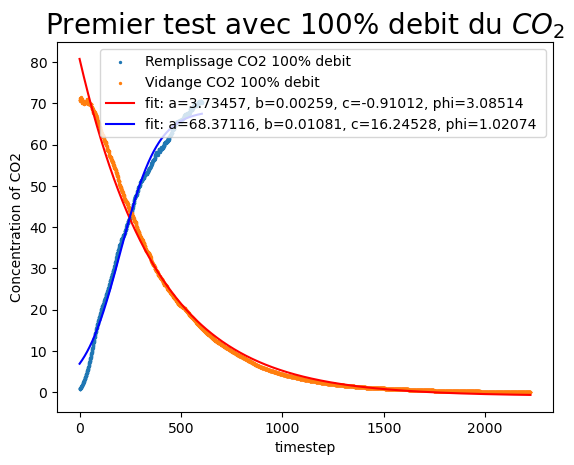

In [5]:
plt.figure()
plt.scatter(db.index/2, db['Media value concentration']/100, label='Remplissage CO2 100% debit', marker='o', s=2)
plt.scatter(db2.index/2, db2['Media value concentration']/100, label = 'Vidange CO2 100% debit', marker='o', s=2)
plt.plot(xdata2, func(xdata2, *popt2), 'r-', label='fit: a=%5.5f, b=%5.5f, c=%5.5f, phi=%5.5f ' % tuple(popt2))
plt.plot(xdata, func2(xdata, *popt), 'b-', label='fit: a=%5.5f, b=%5.5f, c=%5.5f, phi=%5.5f ' % tuple(popt))
plt.xlabel('timestep')
plt.ylabel('Concentration of CO2')
plt.xlabel('timestep')
plt.ylabel('Concentration of CO2')
plt.legend()
plt.title('Premier test avec 100% debit du $CO_2$', fontsize=20)
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

In [6]:
tau_100remplissage=1/0.01081
tau_100vidange=1/0.00259
tau_100remplissage, tau_100vidange

(92.50693802035153, 386.1003861003861)

### Debit 50% $CO_2$ (500 ml/min)

In [7]:
file_path3='/home/ruben/M2-THESE-RUBEN-LIPHY/12-03-24-test-sans-mousse-50CO2.csv'
file_path4='/home/ruben/M2-THESE-RUBEN-LIPHY/12-03-24-test-sans-mousse-50CO2-vidange.csv'
db3=pd.read_csv(file_path3)
db4=pd.read_csv(file_path4)

In [8]:
xdata3=db3.index/2
popt3, pcov3=curve_fit(func2, xdata3, db3['Media value concentration']/100)
popt3

/home/ruben/anaconda3/lib/python3.11/site-packages/pandas/core/indexes/base.py:945: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)


array([6.08882579e+01, 6.30244895e-03, 1.52130902e+01, 1.92638974e+00])

In [9]:
xdata4=db4.index/2
popt4, pcov4=curve_fit(func, xdata4, db4['Media value concentration']/100)
popt4

array([ 3.23105923e+00,  1.22646681e-03, -7.53113892e-01,  3.09564834e+00])

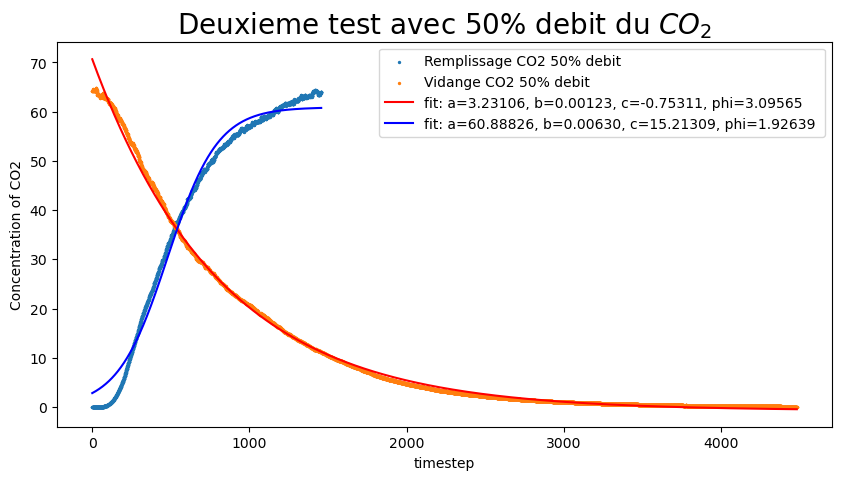

In [10]:
plt.figure()
plt.scatter(db3.index/2, db3['Media value concentration']/100, label='Remplissage CO2 50% debit', marker='o', s=2)
plt.scatter(db4.index/2, db4['Media value concentration']/100, label = 'Vidange CO2 50% debit', marker='o', s=2)
plt.plot(xdata4, func(xdata4, *popt4), 'r-', label='fit: a=%5.5f, b=%5.5f, c=%5.5f, phi=%5.5f ' % tuple(popt4))
plt.plot(xdata3, func2(xdata3, *popt3), 'b-', label='fit: a=%5.5f, b=%5.5f, c=%5.5f, phi=%5.5f ' % tuple(popt3))
plt.xlabel('timestep')
plt.ylabel('Concentration of CO2')
plt.xlabel('timestep')
plt.ylabel('Concentration of CO2')
plt.legend()
plt.title('Deuxieme test avec 50% debit du $CO_2$', fontsize=20)
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

In [11]:
tau_50remplissage=1/0.0063
tau_50vidange=1/0.00123
tau_50remplissage, tau_50vidange

(158.73015873015873, 813.0081300813008)

### Deux tests ensembles

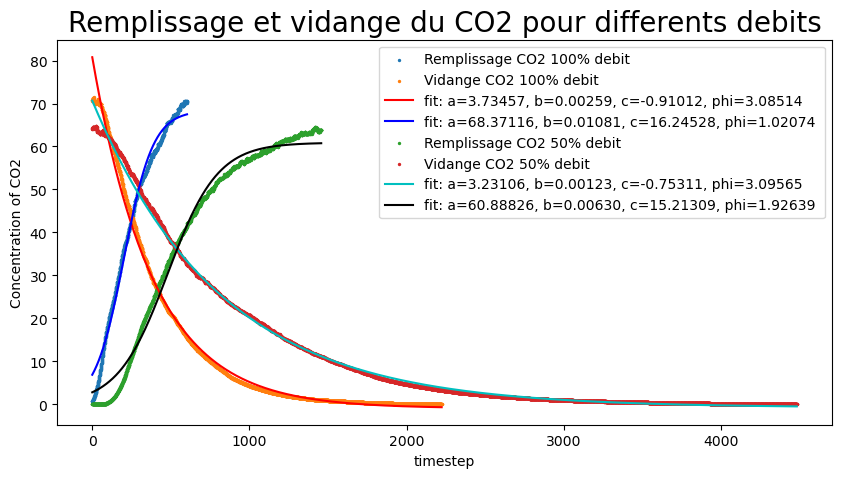

In [12]:
plt.figure()
plt.scatter(db.index/2, db['Media value concentration']/100, label='Remplissage CO2 100% debit', marker='o', s=2)
plt.scatter(db2.index/2, db2['Media value concentration']/100, label = 'Vidange CO2 100% debit', marker='o', s=2)
plt.plot(xdata2, func(xdata2, *popt2), 'r-', label='fit: a=%5.5f, b=%5.5f, c=%5.5f, phi=%5.5f ' % tuple(popt2))
plt.plot(xdata, func2(xdata, *popt), 'b-', label='fit: a=%5.5f, b=%5.5f, c=%5.5f, phi=%5.5f ' % tuple(popt))
plt.scatter(db3.index/2, db3['Media value concentration']/100, label='Remplissage CO2 50% debit', marker='o', s=2)
plt.scatter(db4.index/2, db4['Media value concentration']/100, label = 'Vidange CO2 50% debit', marker='o', s=2)
plt.plot(xdata4, func(xdata4, *popt4), 'c-', label='fit: a=%5.5f, b=%5.5f, c=%5.5f, phi=%5.5f ' % tuple(popt4))
plt.plot(xdata3, func2(xdata3, *popt3), 'k-', label='fit: a=%5.5f, b=%5.5f, c=%5.5f, phi=%5.5f ' % tuple(popt3))
plt.xlabel('timestep')
plt.ylabel('Concentration of CO2')
plt.xlabel('timestep')
plt.ylabel('Concentration of CO2')
plt.legend()
plt.title('Remplissage et vidange du CO2 pour differents debits', fontsize=20)
plt.show()

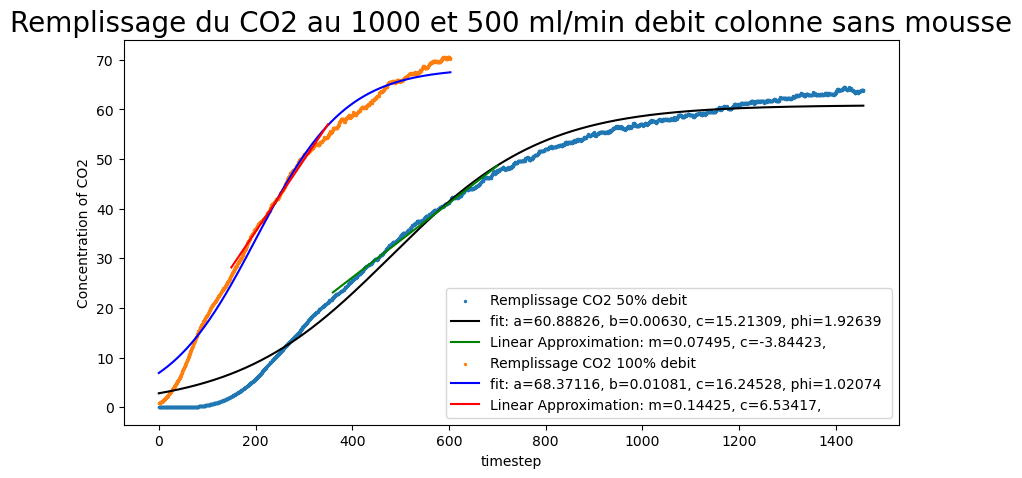

In [39]:
linear_range_50_remplissage= (360, 700)
mask=(xdata3 >= linear_range[0]) & (xdata3 <= linear_range[1])
x_linear_50_remplissage=xdata3[mask]
y_linear_50_remplissage=db3['Media value concentration'][mask]/100


linear_range_100_remplissage= (150, 350)
mask2=(xdata >= linear_range_100_remplissage[0]) & (xdata <= linear_range_100_remplissage[1])
x_linear_100_remplissage=xdata[mask2]
y_linear_100_remplissage=db['Media value concentration'][mask2]/100


#y_linear=func2(xdata3, *popt3)[mask]
def linear_func(x, m, c):
    return m*x+c

popt_linear, _ = curve_fit(linear_func, x_linear, y_linear)
popt_linear_100_remplissage, _ = curve_fit(linear_func, x_linear_100_remplissage, y_linear_100_remplissage)


plt.scatter(db3.index/2, db3['Media value concentration']/100, label='Remplissage CO2 50% debit', marker='o', s=2)
plt.plot(xdata3, func2(xdata3, *popt3), 'k-', label='fit: a=%5.5f, b=%5.5f, c=%5.5f, phi=%5.5f ' % tuple(popt3))
plt.plot(x_linear, linear_func(x_linear, *popt_linear), label='Linear Approximation: m=%5.5f, c=%5.5f, ' % tuple(popt_linear), color='green')

plt.scatter(db.index/2, db['Media value concentration']/100, label='Remplissage CO2 100% debit', marker='o', s=2)
plt.plot(xdata, func2(xdata, *popt), 'b-', label='fit: a=%5.5f, b=%5.5f, c=%5.5f, phi=%5.5f ' % tuple(popt))
plt.plot(x_linear_100_remplissage, linear_func(x_linear_100_remplissage, *popt_linear_100_remplissage), label='Linear Approximation: m=%5.5f, c=%5.5f, ' % tuple(popt_linear_100_remplissage), color='red')
plt.xlabel('timestep')
plt.ylabel('Concentration of CO2')
plt.xlabel('timestep')
plt.ylabel('Concentration of CO2')
plt.title('Remplissage du CO2 au 1000 et 500 ml/min debit colonne sans mousse', fontsize=20)
plt.legend()
plt.show()